# WeatherPy
## Calculating weather for a set of 500+ cities
### The overall goal is to show how weather changes as we approach the equator. 

In [1]:
# setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f" There are {len(cities)} cities in this data set")

 There are 629 cities in this data set


### API Calls



In [4]:
#set units for the URL (want Fahrenheit & mph)
units = "imperial"
#set up log info
print("Beginning Data Retrieval")
print("----------------------------")

#set empty variable for holding data
city_data = []

#set variables for counting
number = 0
set_city = 1

#for loop for getting information on each city
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    #some cities might not have results, use try/except to skip
    try:
        
        #information from 
        name = response["name"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"] 
        country =  response["sys"]["country"]
        date =  response["dt"]
        
        #dictionary for all the data with columns labeled
        dict_data = {"City":name, "Latitude":lat, "Longitude":lng, "Max Temp":temp_max, "Humidity":hum,
                     "Cloudiness":cloud, "Wind Speed":wind, "Country":country, "Date":date}
        #append dictionary data to the empty city_data
        city_data.append(dict_data)
        
        #update numbers for printing
        number = number + 1
        
        #print log results
        print(f"Procesing Record {number} of Set {set_city} | {name}")
        
        #changing counting variables
        if number == 50:
            number = 0
            set_city = set_city + 1
    
    #for those cities not in the API
    except KeyError:
        print("City Not Found. Skipping...")
        continue

#finishing print log        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
City Not Found. Skipping...
Procesing Record 1 of Set 1 | Paramonga
Procesing Record 2 of Set 1 | Olafsvik
Procesing Record 3 of Set 1 | Provideniya
Procesing Record 4 of Set 1 | Qasigiannguit
City Not Found. Skipping...
Procesing Record 5 of Set 1 | George Town
Procesing Record 6 of Set 1 | Zeya
City Not Found. Skipping...
Procesing Record 7 of Set 1 | Busca
Procesing Record 8 of Set 1 | Mount Isa
Procesing Record 9 of Set 1 | Virginia Beach
Procesing Record 10 of Set 1 | Ushuaia
Procesing Record 11 of Set 1 | Sakhnovshchyna
Procesing Record 12 of Set 1 | Ilhabela
City Not Found. Skipping...
Procesing Record 13 of Set 1 | Bluff
Procesing Record 14 of Set 1 | Port Alfred
Procesing Record 15 of Set 1 | Birao
City Not Found. Skipping...
Procesing Record 16 of Set 1 | Lagos
Procesing Record 17 of Set 1 | Bengkulu
Procesing Record 18 of Set 1 | Petropavlovsk-Kamchatskiy
Procesing Record 19 of Set 1 | Najrān
Procesing Record 20 of Set 1 

Procesing Record 41 of Set 4 | Qeshm
Procesing Record 42 of Set 4 | Krasnyy Chikoy
Procesing Record 43 of Set 4 | Bonavista
Procesing Record 44 of Set 4 | Caucayá
Procesing Record 45 of Set 4 | Arraial do Cabo
Procesing Record 46 of Set 4 | Pevek
Procesing Record 47 of Set 4 | Kruisfontein
Procesing Record 48 of Set 4 | Norman Wells
Procesing Record 49 of Set 4 | Kalamazoo
Procesing Record 50 of Set 4 | Husavik
Procesing Record 1 of Set 5 | Kirovskiy
Procesing Record 2 of Set 5 | The Pas
Procesing Record 3 of Set 5 | Kumul
Procesing Record 4 of Set 5 | Tsaratanana
Procesing Record 5 of Set 5 | Machado
Procesing Record 6 of Set 5 | Semnan
Procesing Record 7 of Set 5 | Mutoko
Procesing Record 8 of Set 5 | Kaitangata
Procesing Record 9 of Set 5 | Kieta
Procesing Record 10 of Set 5 | Manggar
Procesing Record 11 of Set 5 | Cavalcante
Procesing Record 12 of Set 5 | Falmouth
Procesing Record 13 of Set 5 | Ouargaye
Procesing Record 14 of Set 5 | Sinnamary
Procesing Record 15 of Set 5 | Oktyabr

City Not Found. Skipping...
Procesing Record 33 of Set 8 | Tarauacá
Procesing Record 34 of Set 8 | Camopi
Procesing Record 35 of Set 8 | Ubinskoye
Procesing Record 36 of Set 8 | Gijón
Procesing Record 37 of Set 8 | Sisimiut
Procesing Record 38 of Set 8 | Zhigansk
Procesing Record 39 of Set 8 | Meïganga
Procesing Record 40 of Set 8 | Lensk
Procesing Record 41 of Set 8 | Salinas
City Not Found. Skipping...
Procesing Record 42 of Set 8 | Pahrump
City Not Found. Skipping...
Procesing Record 43 of Set 8 | Hirara
Procesing Record 44 of Set 8 | Renqiu
Procesing Record 45 of Set 8 | San Quintín
Procesing Record 46 of Set 8 | Billings Metropolitan Area
Procesing Record 47 of Set 8 | Khovu-Aksy
Procesing Record 48 of Set 8 | Cherskiy
Procesing Record 49 of Set 8 | Umbuzeiro
Procesing Record 50 of Set 8 | Skała
Procesing Record 1 of Set 9 | Port Moresby
Procesing Record 2 of Set 9 | Kanye
Procesing Record 3 of Set 9 | Manali
Procesing Record 4 of Set 9 | Mezen'
Procesing Record 5 of Set 9 | Bolsh

Procesing Record 21 of Set 12 | Bridlington
Procesing Record 22 of Set 12 | Skibbereen
City Not Found. Skipping...
Procesing Record 23 of Set 12 | Osorno
Procesing Record 24 of Set 12 | Inhambane
Procesing Record 25 of Set 12 | Namie
Procesing Record 26 of Set 12 | Las Vegas
Procesing Record 27 of Set 12 | Hoa Binh
----------------------------
Data Retrieval Complete
----------------------------


## Converting API Data to DataFrame

In [5]:
#set information as a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paramonga,-10.67,-77.83,66.65,87,99,7.45,PE,1607580098
1,Olafsvik,64.89,-23.71,35.87,85,100,23.87,IS,1607580098
2,Provideniya,64.38,-173.30,10.40,66,40,6.71,RU,1607580098
3,Qasigiannguit,68.82,-51.19,17.60,44,60,2.24,GL,1607580098
4,George Town,5.41,100.34,91.40,70,20,8.05,MY,1607580098
...,...,...,...,...,...,...,...,...,...
572,Osorno,-40.57,-73.15,51.80,81,1,2.62,CL,1607580189
573,Inhambane,-23.86,35.38,77.00,69,20,9.17,MZ,1607580194
574,Namie,37.48,141.00,48.00,85,96,1.21,JP,1607580194
575,Las Vegas,36.17,-115.14,53.60,25,1,4.70,US,1607579375


## Export the data into a .csv.


In [6]:
#export to csv
city_data_df.to_csv(r"../Output_Data/Cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.


In [40]:
#do any cities have over 100% humidity
#show results
city_data_df[city_data_df["Humidity"] == 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,Busca,44.52,7.47,36.00,100,32,3.36,IT,1607580099
9,Ushuaia,-54.80,-68.30,42.80,100,40,10.29,AR,1607580061
65,Torbay,47.67,-52.73,37.99,100,90,16.11,CA,1607580109
101,Pasinler,39.98,41.68,24.80,100,75,1.77,TR,1607580115
199,Husavik,66.04,-17.34,33.80,100,90,11.41,IS,1607580132
211,Falmouth,50.15,-5.07,50.00,100,62,19.46,GB,1607580133
274,Port Elizabeth,-33.92,25.57,64.40,100,90,4.70,ZA,1607580145
278,Houma,29.60,-90.72,53.01,100,90,3.60,US,1607580146
317,Kiryat Gat,31.61,34.76,57.99,100,0,4.00,IL,1607580152
341,Port Hardy,50.70,-127.42,42.80,100,90,6.93,CA,1607580156


In [41]:
#remove cities with over 100% humidity
#use this data frame
clean_city_data = city_data_df[(city_data_df["Humidity"] < 100)]
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paramonga,-10.67,-77.83,66.65,87,99,7.45,PE,1607580098
1,Olafsvik,64.89,-23.71,35.87,85,100,23.87,IS,1607580098
2,Provideniya,64.38,-173.30,10.40,66,40,6.71,RU,1607580098
3,Qasigiannguit,68.82,-51.19,17.60,44,60,2.24,GL,1607580098
4,George Town,5.41,100.34,91.40,70,20,8.05,MY,1607580098


# Plotting the Data as Scatter Plots
#### Total of 12 Scatter Plots

## Latitude vs. Temperature Plot

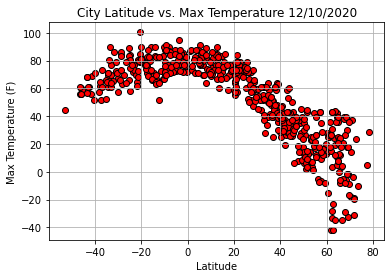

In [24]:
#using the clean_city_data plot several scatter plots
#plot 1
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Max Temp"]
plt.title("City Latitude vs. Max Temperature 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.grid()
plt.show()

#### Analysis Plot 1: Latitude vs. Temperature Plot
This scatter plot is comparing the maximum temperature against the latitude. We can see that incrasing temperatures as we move closer to where the latitude equals 0 (i.e. the equator).

## Latitude vs. Humidity Plot

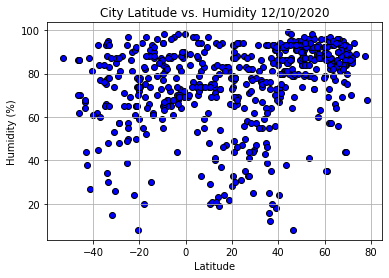

In [25]:
#plot 2
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity"]
plt.title("City Latitude vs. Humidity 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.show()

#### Analysis Plot 2: Latitude vs. Humidity Plot
This plot is analyzing humidity against the latitude of each city. There isn't much of a correlation for humidity versus the latitude as there is a lot of variety in the data. The dataset did remove any city with 100% humidity however. 

## Latitude vs. Cloudiness Plot

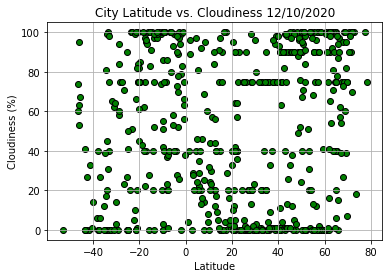

In [26]:
#plot 3
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloudiness"]
plt.title("City Latitude vs. Cloudiness 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.grid()
plt.show()

#### Analysis Plot 3: Latitude vs. Cloudiness Plot
This plot is analyzing the cloudiness of each city against its latitude. Like with the previous one, there's a lot of variation in the data. No stand out correlation. 

## Latitude vs. Wind Speed Plot

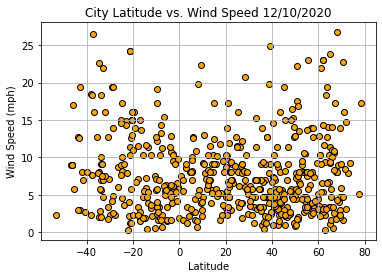

In [27]:
#plot 4
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed"]
plt.title("City Latitude vs. Wind Speed 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.grid()
plt.show()

#### Analysis Plot 4: Latitude vs. Wind Speed Plot
This plot is comparing the wind speed to the city latitude. Again, lots of variation, and no discernable pattern. 

## Linear Regression

In [60]:
#set new data frame that is only northern hemisphere
north_hem = clean_city_data[city_data_df["Latitude"] >= 0]
north_hem.head()

C:\Users\Shadow\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Olafsvik,64.89,-23.71,35.87,85,100,23.87,IS,1607580098
2,Provideniya,64.38,-173.30,10.40,66,40,6.71,RU,1607580098
3,Qasigiannguit,68.82,-51.19,17.60,44,60,2.24,GL,1607580098
4,George Town,5.41,100.34,91.40,70,20,8.05,MY,1607580098
5,Zeya,53.75,127.27,3.60,87,100,2.66,RU,1607580098


In [43]:
#set second new data frame that is only southern hemisphere
south_hem = clean_city_data[city_data_df["Latitude"] < 0]
south_hem.head()

C:\Users\Shadow\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paramonga,-10.67,-77.83,66.65,87,99,7.45,PE,1607580098
7,Mount Isa,-20.73,139.50,100.40,8,100,5.82,AU,1607580061
11,Ilhabela,-23.78,-45.36,71.73,86,100,3.56,BR,1607580100
12,Bluff,-46.60,168.33,55.99,86,60,8.99,NZ,1607580100
13,Port Alfred,-33.59,26.89,68.31,78,100,5.64,ZA,1607580100


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8734894229150851


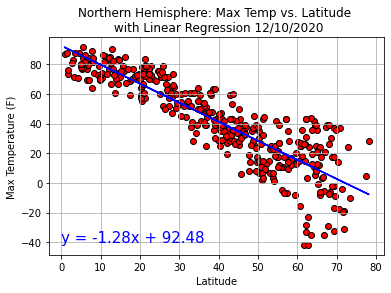

In [56]:
#plot 5
x_axis = north_hem["Latitude"]
y_axis = north_hem["Max Temp"]
plt.title("Northern Hemisphere: Max Temp vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(0,-40),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.show()


#### Analysis Plot 5: Northern Hemisphere: Max Temp vs Latitude w/Linear Regression
This plot is analyzing just the northen hemisphere with maximum temperature against the latitude. We can see the linear regression line (in blue), and it is showing a very strong negative correlation (r = -.87) of the two variables. As we move further from the equator (latitude = 0), the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5724834305731932


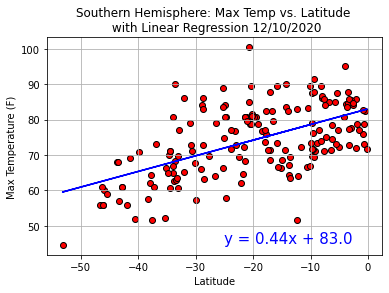

In [58]:
#plot 6
x_axis = south_hem["Latitude"]
y_axis = south_hem["Max Temp"]
plt.title("Southern Hemisphere: Max Temp vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(-25,45),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 6: Southern Hemisphere: Max Temp vs Latitude w/Linear Regression
This plot is analyzing the southern hemisphere comparing maximum temp to the city's latitude with linear regression line (in blue). This one has a moderate positive correlation (r = .57) showing that as we get closer to the equator the temperature increases. This one is giving us the same result, closer to the equator the higher the temperature, as the previous plot just explored in reverse. However, the southern hemishere has a weaker correlation. It should be noted that this dataset has less data points than the northern set. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33139562165643954


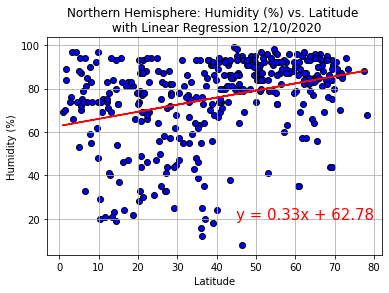

In [63]:
#plot 7
x_axis = north_hem["Latitude"]
y_axis = north_hem["Humidity"]
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 7: Northern Hemisphere: Humidity vs Latitude w/Linear Regression
This plot is showing a showing the correlation for the northern hemisphere of humidty and city latitude. There is a  weak positive correlation (r = .33) of the humidity increasing as we move further north away from the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18694632784785084


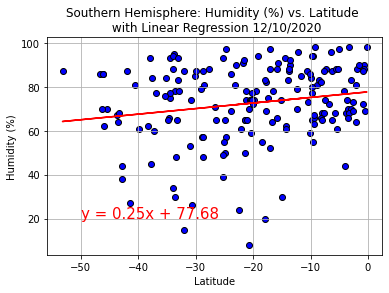

In [64]:
#plot 8
x_axis = south_hem["Latitude"]
y_axis = south_hem["Humidity"]
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 8: Southern Hemisphere: Humidity vs Latitude w/Linear Regression
This plot is showing the correlation for the southern hemisphere for the humidity versus the city latitude. This one also has a very weak positive correlation (r = .18). Just like the previous plot for the same variables in the northern hemisphere, it's positive. However, it is a much weaker correlation, potentially considered having no correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3032386052207124


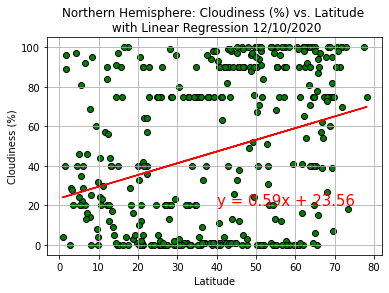

In [65]:
#plot 9
x_axis = north_hem["Latitude"]
y_axis = north_hem["Cloudiness"]
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 9: Northern Hemisphere: Cloudiness vs Latitude w/Linear Regression
This plot is comparing the cloudiness against the latitude in the northern hemisphere. Despite visually appearing very sporadic and not having much of a correlation, the data suggests that there is a weak positive correlation (r = .30) between the two. That means going further from the equator, there is more cloudiness as a percentage. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3647069148886287


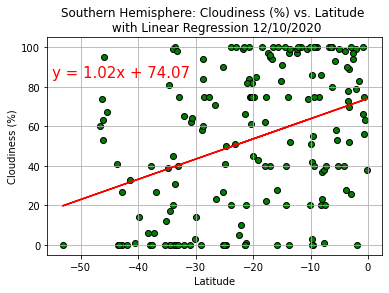

In [69]:
#plot 10
x_axis = south_hem["Latitude"]
y_axis = south_hem["Cloudiness"]
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 10: Southern Hemisphere: Cloudiness vs Latitude w/Linear Regression
This plot is showing the cloudiness vs latitude for the southern hemisphere. There is a weak positive correlation (r = .36) for this dataset showing that as we get closer to the equator the cloudiness increases somewhat. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08324957946848954


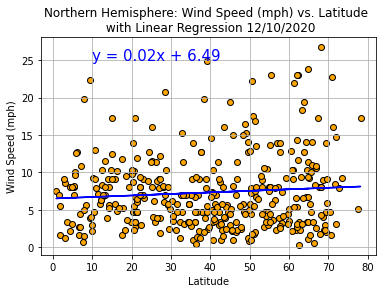

In [71]:
#plot 11
x_axis = north_hem["Latitude"]
y_axis = north_hem["Wind Speed"]
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(10,25),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 11: Northern Hemisphere: Wind Speed vs Latitude w/Linear Regression
This plot is showing the wind speed vs latitude for the northern hemisphere. There is no correlation here (r=.08) that would be significant to note. The r value is slightly positive, but the value is extremely close to zero. Therefore, there is not much correlation between wind speed and latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22151330522013626


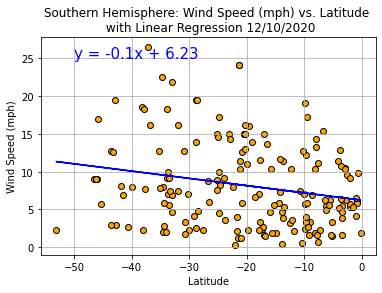

In [72]:
#plot 12
x_axis = south_hem["Latitude"]
y_axis = south_hem["Wind Speed"]
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(-50,25),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.show()

#### Analysis Plot 12: Southern Hemisphere: Wind Speed vs Latitude w/Linear Regression
This last plot is for wind speed versus latitude. There is a weak negative correlation (r = -0.22) showing that as we get closer to the equator (latitude = 0) the wind speed gets lower to some degree. 